In [33]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency

In [34]:
data_enriched = pd.read_csv("research_final.csv", sep=";")  

In [35]:
data_enriched.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460 entries, 0 to 4459
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   anonym_id             4460 non-null   object 
 1   year                  4460 non-null   int64  
 2   gender                4460 non-null   object 
 3   time_dep_age_group    4460 non-null   object 
 4   main_research_area    4460 non-null   object 
 5   institute_type        4460 non-null   object 
 6   running_erc_project   4460 non-null   bool   
 7   rolling_avg_grade     4460 non-null   float64
 8   n_articles_per_year   4460 non-null   int64  
 9   n_preprints_per_year  4460 non-null   int64  
 10  n_citations_per_year  4460 non-null   int64  
 11  max_rolling_7         4460 non-null   float64
 12  max_articles_7        4460 non-null   float64
 13  max_preprints_7       4460 non-null   float64
 14  max_citations_7       4460 non-null   float64
dtypes: bool(1), float64(5

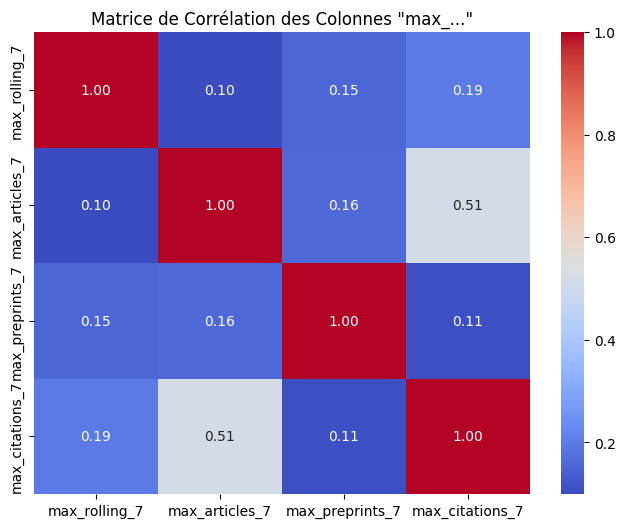

In [36]:
# Sélection des colonnes 'max' pour la matrice de corrélation
max_columns = ['max_rolling_7', 'max_articles_7', 'max_preprints_7', 'max_citations_7']
correlation_matrix = data_enriched[max_columns].corr()  # Assurez-vous que 'data_enriched' est le bon DataFrame


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Colonnes "max_..."')
plt.show()


En résumé, la relation la plus notable est celle entre le nombre maximum d'articles publiés et le nombre maximum de citations, qui montre une corrélation modérée positive. Les autres corrélations sont relativement faibles, suggérant des relations faibles entre ces variables.

In [37]:
# Replace 'f' with 'female' and 'm' with 'male' in the 'gender' column
data_enriched['gender'] = data_enriched['gender'].replace({'f': 'female', 'm': 'male'})

In [38]:
# Calculer le nombre et le pourcentage
gender_count = data_enriched['gender'].value_counts().reset_index()
gender_count.columns = ['gender', 'count']

# Calculer le pourcentage
gender_count['percentage'] = (gender_count['count'] / gender_count['count'].sum() * 100).round()

# Afficher le tableau final
gender_count


,gender,count,percentage
0,male,3397,76.0
1,female,1063,24.0


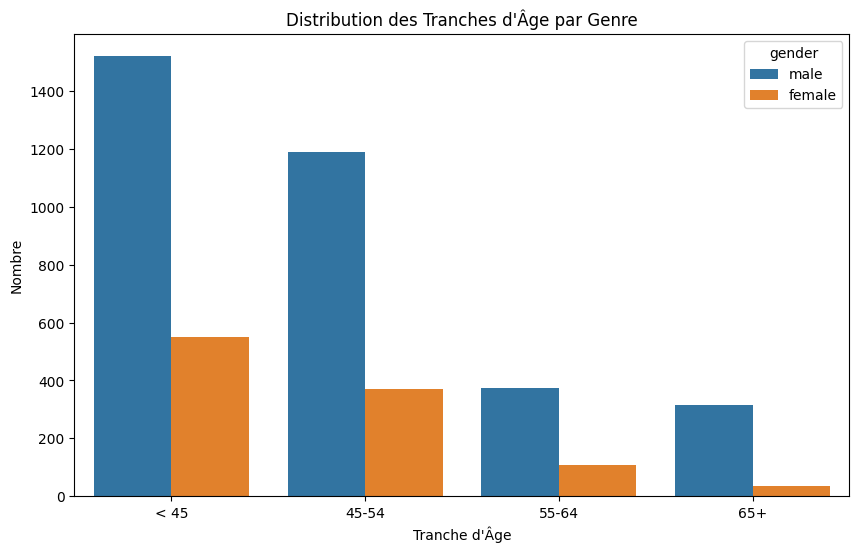

In [39]:
# Trier les tranches d'âge dans l'ordre chronologique souhaité
age_order = ["< 45", "45-54", "55-64", "65+"]
gender_order = ["male", "female"]

# Créer un barplot pour la distribution des tranches d'âge par genre
plt.figure(figsize=(10, 6))
sns.countplot(data=data_enriched, x='time_dep_age_group', hue='gender', order=age_order, hue_order=gender_order)
plt.title('Distribution des Tranches d\'Âge par Genre')
plt.xlabel('Tranche d\'Âge')
plt.ylabel('Nombre')
plt.show()


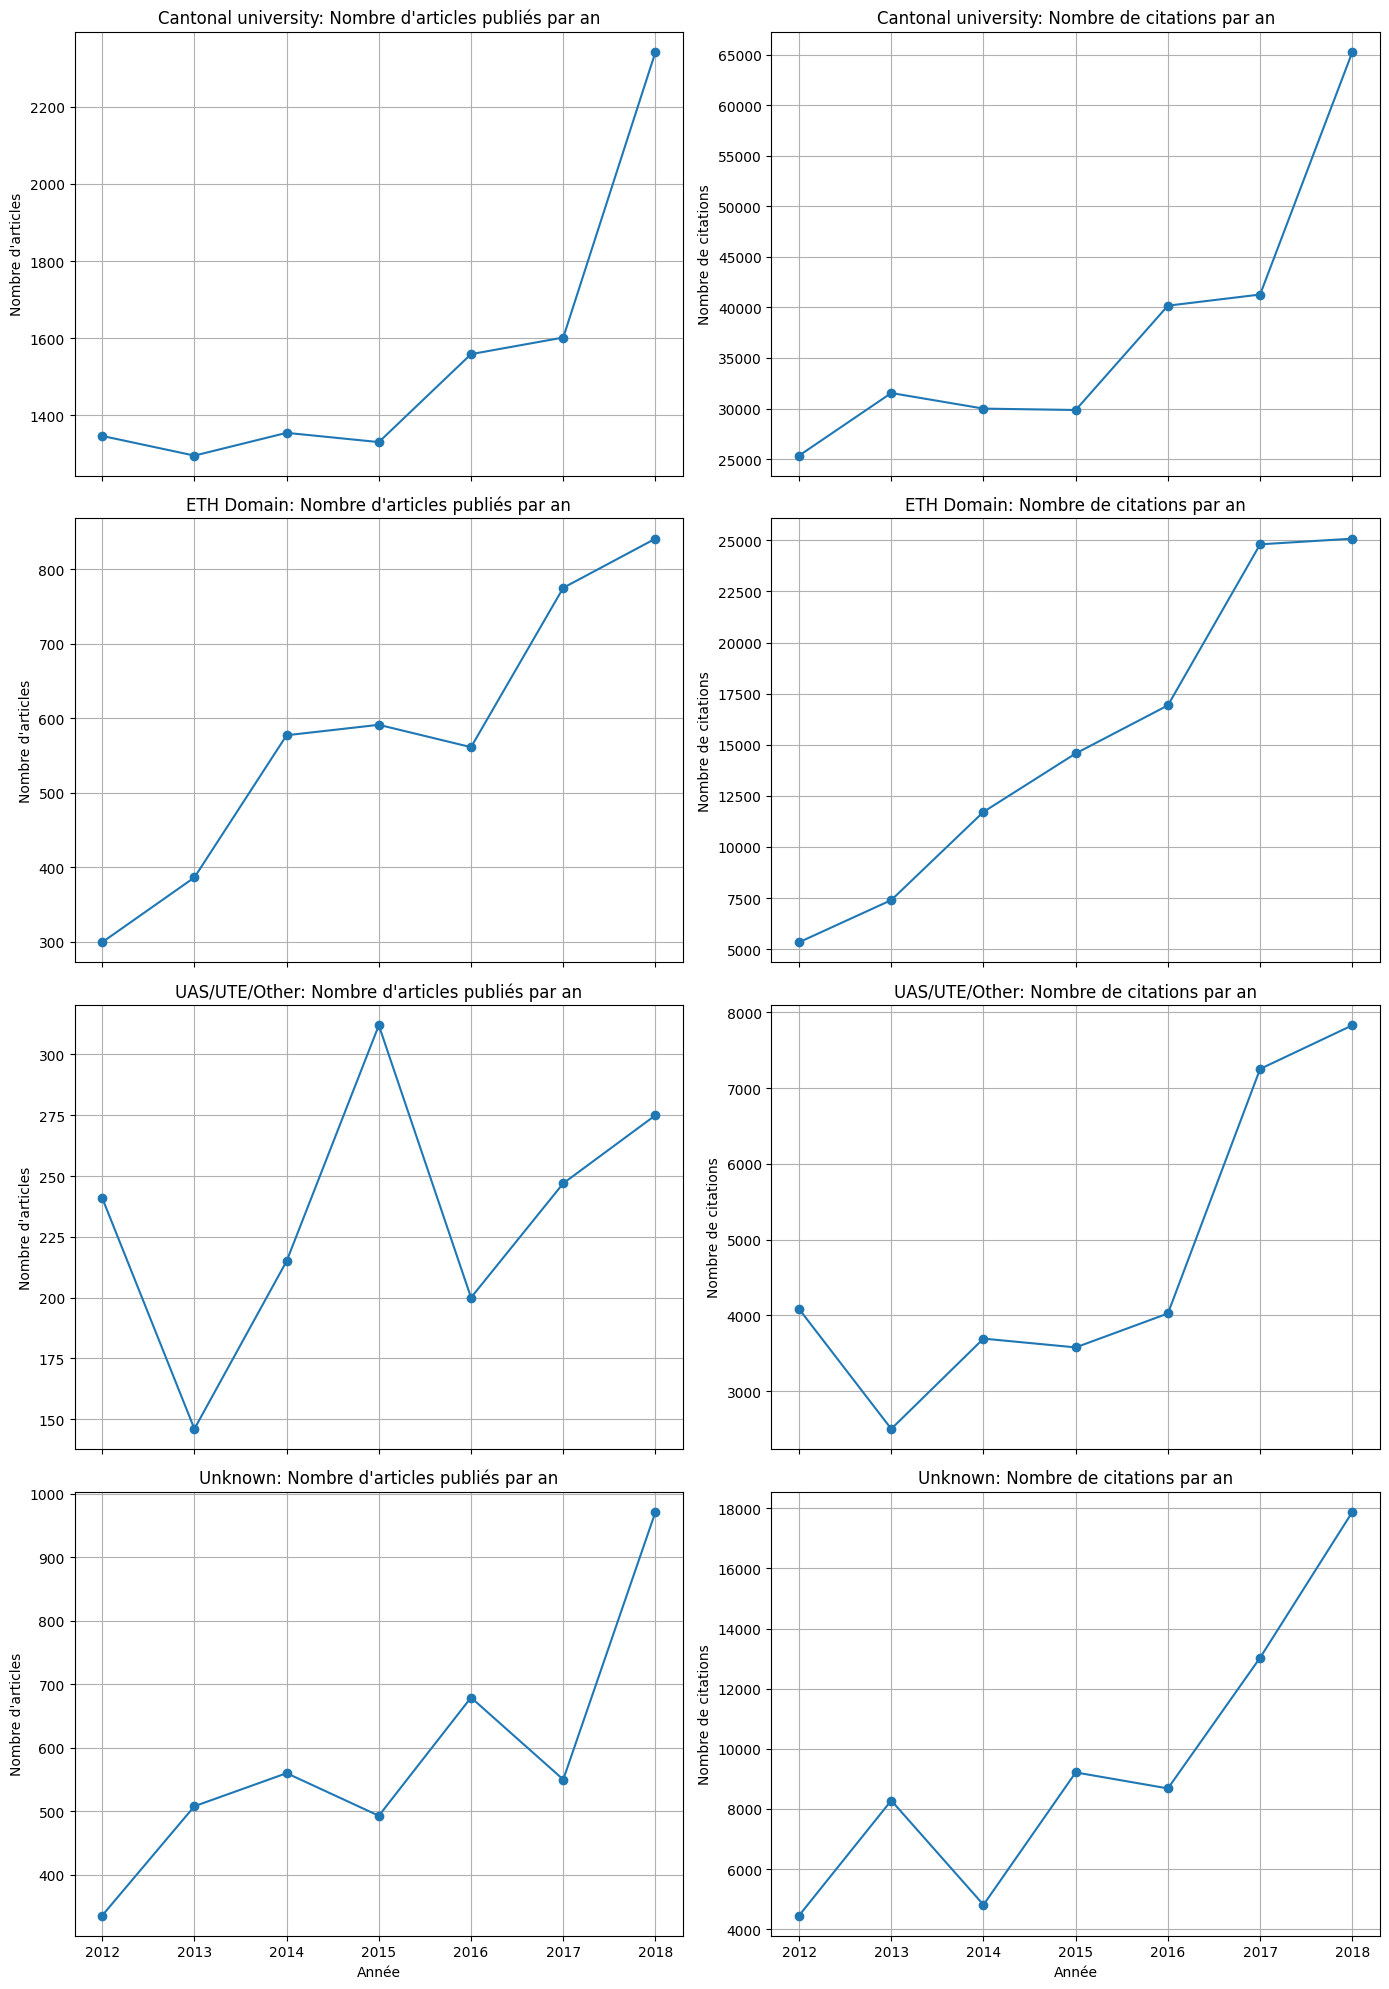

In [40]:
# Filtrer les données pour conserver uniquement celles nécessaires à cette visualisation
filtered_data_b = data_enriched

# Obtenir les types d'instituts uniques
institute_types = filtered_data_b['institute_type'].unique()

# Créer les sous-graphiques en fonction du nombre de types d'instituts
fig, ax = plt.subplots(len(institute_types), 2, figsize=(14, len(institute_types) * 5), sharex=True)

for i, institute in enumerate(institute_types):
    # Filtrer les données par type d'institut et regrouper par année
    institute_data = filtered_data_b[filtered_data_b['institute_type'] == institute].groupby('year')[['max_articles_7', 'max_citations_7']].sum()
    
    # Tracer le nombre d'articles publiés par an
    institute_data['max_articles_7'].plot(ax=ax[i, 0], marker='o', title=f"{institute}: Nombre d'articles publiés par an")
    ax[i, 0].set_ylabel("Nombre d'articles")
    ax[i, 0].grid(True)
    
    # Tracer le nombre de citations par an
    institute_data['max_citations_7'].plot(ax=ax[i, 1], marker='o', title=f"{institute}: Nombre de citations par an")
    ax[i, 1].set_ylabel("Nombre de citations")
    ax[i, 1].grid(True)
    
    # Définir les étiquettes des années sur l'axe x
    ax[i, 0].set_xticks(institute_data.index)
    ax[i, 1].set_xticks(institute_data.index)
    ax[i, 0].set_xticklabels(institute_data.index.astype(int))
    ax[i, 1].set_xticklabels(institute_data.index.astype(int))

# Définir le label de l'axe x pour le dernier sous-graphe de chaque colonne
ax[-1, 0].set_xlabel("Année")
ax[-1, 1].set_xlabel("Année")

plt.tight_layout()
plt.show()


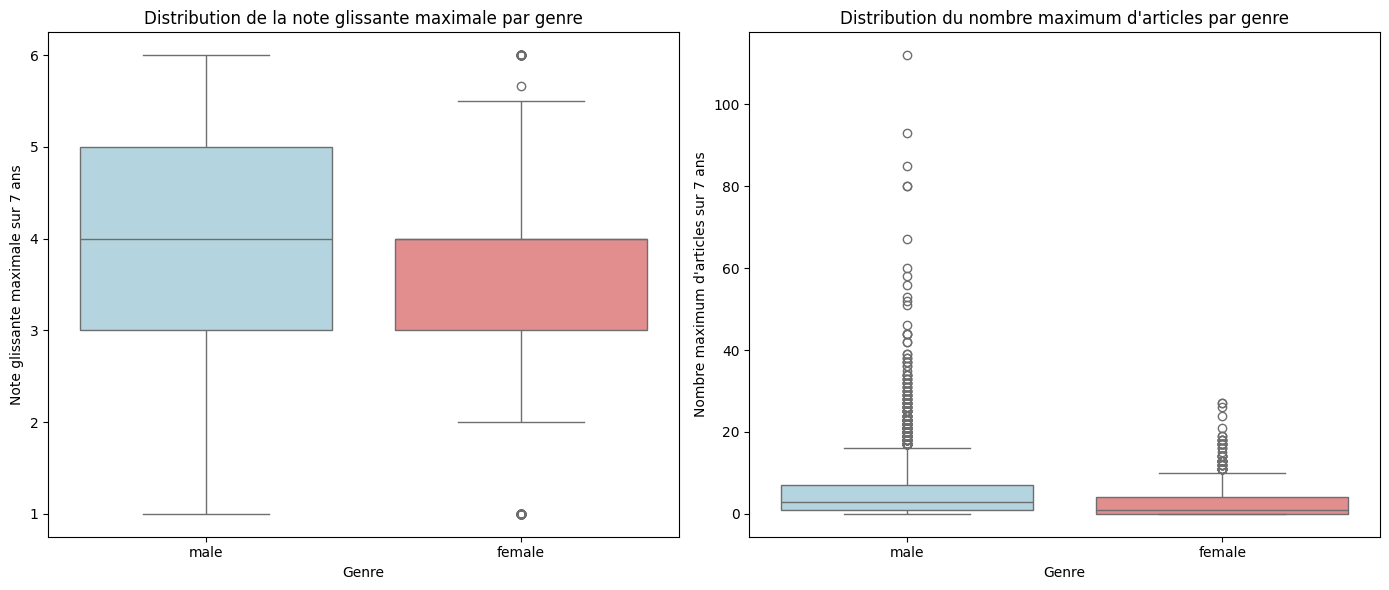

In [41]:
# Définir une palette de couleurs personnalisée avec les mêmes couleurs pour "male" et "female"
custom_palette = {"male": "lightblue", "female": "lightcoral"}

# Créer les subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot pour max_rolling_7 avec la palette personnalisée
sns.boxplot(x='gender', y='max_rolling_7', data=filtered_data_b, ax=axes[0], hue='gender', palette=custom_palette, dodge=False)
axes[0].set_title("Distribution de la note glissante maximale par genre")
axes[0].set_xlabel("Genre")
axes[0].set_ylabel("Note glissante maximale sur 7 ans")
legend = axes[0].get_legend()
if legend:
    legend.remove()  # Supprimer la légende si elle existe

# Boxplot pour max_articles_7 avec la même palette personnalisée
sns.boxplot(x='gender', y='max_articles_7', data=filtered_data_b, ax=axes[1], hue='gender', palette=custom_palette, dodge=False)
axes[1].set_title("Distribution du nombre maximum d'articles par genre")
axes[1].set_xlabel("Genre")
axes[1].set_ylabel("Nombre maximum d'articles sur 7 ans")
legend = axes[1].get_legend()
if legend:
    legend.remove()  # Supprimer la légende si elle existe

# Ajuster l'affichage
plt.tight_layout()
plt.show()


In [42]:
# Préparer les données pour le clustering en sélectionnant les colonnes pertinentes
pca_data = data_enriched[
    [
        'anonym_id', 
        'year', 
        'gender', 
        'time_dep_age_group', 
        'main_research_area', 
        'institute_type', 
        'running_erc_project', 
        'max_rolling_7', 
        'max_articles_7', 
        'max_preprints_7', 
        'max_citations_7'
    ]
].copy()  # Utiliser .copy() pour éviter les warnings liés à la modification des données originales

# Afficher les premières lignes pour vérifier
pca_data.head()


,anonym_id,year,gender,time_dep_age_group,main_research_area,institute_type,running_erc_project,max_rolling_7,max_articles_7,max_preprints_7,max_citations_7
0,195139353,2015,male,55-64,LS,Cantonal university,False,6.0,8.0,0.0,458.0
1,27722caaa6,2017,male,45-54,LS,Cantonal university,False,6.0,5.0,1.0,790.0
2,7bc8a77d76,2015,male,55-64,LS,Cantonal university,False,6.0,9.0,0.0,400.0
3,c69bdefbe8,2012,male,55-64,LS,Cantonal university,False,6.0,10.0,0.0,212.0
4,c42053e837,2018,male,< 45,MINT,ETH Domain,False,6.0,0.0,1.0,93.0


In [43]:
numeric_data = pca_data[['max_rolling_7', 'max_articles_7', 'max_preprints_7', 'max_citations_7']]


In [44]:
# Initialiser le standard scaler
scaler = StandardScaler()

# Appliquer la standardisation sur les données numériques
standardized_data = scaler.fit_transform(numeric_data)

# Convertir le résultat en DataFrame pour une meilleure lisibilité
standardized_data = pd.DataFrame(standardized_data, columns=numeric_data.columns)

# Afficher les premières lignes des données standardisées
standardized_data.head()


,max_rolling_7,max_articles_7,max_preprints_7,max_citations_7
0,1.894568,0.496927,-0.251242,1.365470
1,1.894568,0.056166,0.512067,2.649949
2,1.894568,0.643847,-0.251242,1.141073
3,1.894568,0.790768,-0.251242,0.413717
4,1.894568,-0.678436,0.512067,-0.046684


In [45]:
# Réaliser la PCA sur les données standardisées
pca = PCA(n_components=2)  # Limiter aux deux premières composantes principales
pca_result = pca.fit_transform(standardized_data)

# Récupérer les noms des variables pour les labels
variables = standardized_data.columns

# Afficher les résultats de la PCA
pca_result[:5], variables.tolist()


(array([[ 1.7384971 , -0.37452299],
        [ 2.52459704, -0.61198863],
        [ 1.6880475 , -0.39250348],
        [ 1.32232778, -0.5697034 ],
        [ 0.38321739, -1.73092908]]),
 ['max_rolling_7', 'max_articles_7', 'max_preprints_7', 'max_citations_7'])

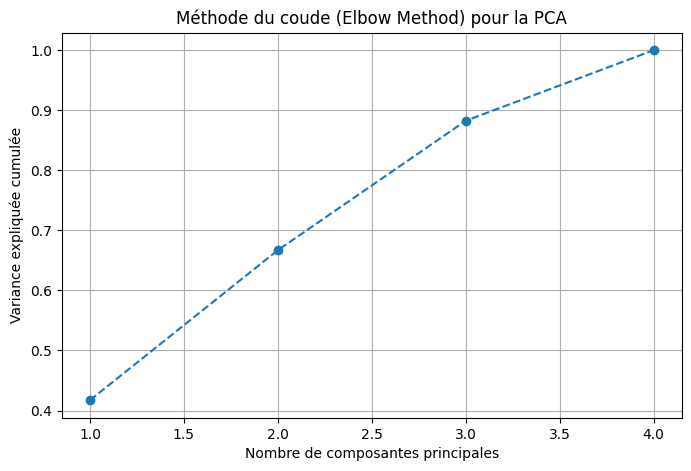

In [46]:
# Initialiser le standard scaler
scaler = StandardScaler()

# Appliquer la standardisation sur les données numériques
standardized_data = scaler.fit_transform(numeric_data)

# Réaliser la PCA pour un nombre élevé de composantes (autant que le nombre de features)
pca = PCA(n_components=len(numeric_data.columns))
pca.fit(standardized_data)

# Calculer la variance expliquée pour chaque composante
explained_variance = pca.explained_variance_ratio_

# Tracer le graphe de la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Méthode du coude (Elbow Method) pour la PCA')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.grid(True)
plt.show()


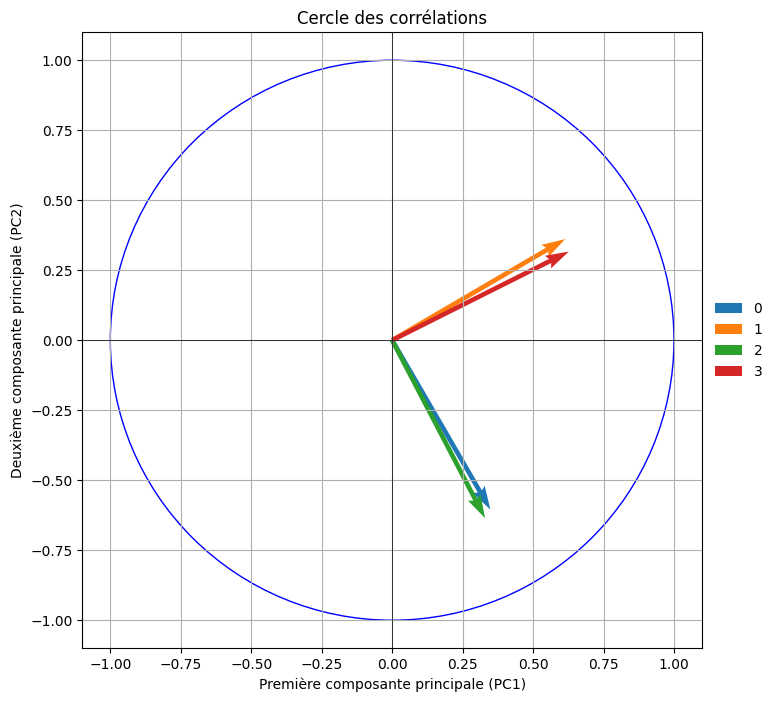

In [47]:
# Réaliser la PCA sur les données standardisées
pca = PCA(n_components=2)
pca_result = pca.fit_transform(standardized_data)

# Si standardized_data est un NumPy array, remplacez par la liste des noms des variables
variables = standardized_data.columns if isinstance(standardized_data, pd.DataFrame) else np.arange(standardized_data.shape[1])

plt.figure(figsize=(8, 8))

# Couleurs pour chaque variable avec la méthode mise à jour
colors = matplotlib.colormaps.get_cmap('tab10')

# Boucle pour tracer les vecteurs des composantes principales
for i, var in enumerate(variables):
    plt.quiver(0, 0, 
               pca.components_[0, i], pca.components_[1, i], 
               angles='xy', scale_units='xy', scale=1, 
               color=colors(i % 10), label=var)  # Limite des couleurs à 10 (tab10)

# Tracer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='b', fill=False)
plt.gca().add_artist(circle)

# Limites et étiquettes
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.title('Cercle des corrélations')

# Déplacer la légende à l'extérieur du cercle
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Grille et lignes d'axes
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.show()


Commentaire :
Variance expliquée :

La première composante principale (PC1) explique 41.72% de la variance totale, tandis que la deuxième composante principale (PC2) en explique 25.00%. Cela signifie que ces deux composantes principales capturent environ 66.72% de la variance totale des données, ce qui est un bon résumé de l'information contenue dans les données.
Contributions des variables :

max_citations_7 et max_articles_7 sont les variables qui contribuent le plus à la première composante principale (PC1). Elles sont fortement corrélées avec cette composante, ce qui indique qu'elles jouent un rôle significatif dans la variation capturée par PC1.
max_rolling_7 et max_preprints_7 ont des contributions plus élevées à la deuxième composante principale (PC2) mais dans des directions opposées (négative pour max_rolling_7 et positive pour max_preprints_7).
Interprétation générale :

Les variables liées aux citations et aux articles (quantité et qualité) sont dominantes dans l'analyse, suggérant que ces facteurs sont les principaux moteurs des différences dans les données. Les variables liées à la note glissante et aux prépublications, bien qu'importantes, apportent des nuances supplémentaires, capturées par la deuxième composante principale.
Cette synthèse montre quelles variables sont les plus influentes dans la réduction dimensionnelle opérée par la PCA, ce qui est crucial pour comprendre les structures sous-jacentes des données avant de procéder à un clustering

In [48]:

# Choisir le nombre optimal de clusters (ici, 4 est utilisé comme exemple)
optimal_clusters = 4

# Appliquer K-means avec n_init explicitement défini
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
clusters = kmeans.fit_predict(standardized_data)

# Ajouter les résultats du clustering à vos données
pca_data['Cluster'] = clusters

# Afficher les premières lignes avec les clusters assignés
pca_data.head()


,anonym_id,year,gender,time_dep_age_group,main_research_area,institute_type,running_erc_project,max_rolling_7,max_articles_7,max_preprints_7,max_citations_7,Cluster
0,195139353,2015,male,55-64,LS,Cantonal university,False,6.0,8.0,0.0,458.0,0
1,27722caaa6,2017,male,45-54,LS,Cantonal university,False,6.0,5.0,1.0,790.0,2
2,7bc8a77d76,2015,male,55-64,LS,Cantonal university,False,6.0,9.0,0.0,400.0,0
3,c69bdefbe8,2012,male,55-64,LS,Cantonal university,False,6.0,10.0,0.0,212.0,0
4,c42053e837,2018,male,< 45,MINT,ETH Domain,False,6.0,0.0,1.0,93.0,0


Interprétation des Clusters :

Cluster 0 :
Haute productivité avec modération : Les membres de ce cluster ont une note glissante élevée, un nombre relativement élevé d'articles publiés, et un nombre significatif de prépublications et de citations. Cependant, ils ne dominent pas en termes de citations ou de projets ERC, ce qui suggère une productivité modérée mais constante.

Cluster 1 :
Faible productivité : Ce cluster est caractérisé par une faible note glissante, un faible nombre d'articles, de prépublications, et de citations. Les membres de ce cluster sont probablement moins productifs ou en début de carrière.

Cluster 2 :
Moyenne productivité avec moins de reconnaissance : Ce groupe présente des caractéristiques similaires au Cluster 0 en termes de note glissante, mais avec moins d'articles publiés et de citations. Le faible nombre de prépublications et de projets ERC pourrait indiquer une reconnaissance moindre dans la communauté scientifique.

Cluster 3 :
Haute productivité et forte reconnaissance : Ce cluster est le plus distinct, avec un nombre très élevé d'articles publiés et de citations. Ce groupe pourrait représenter les chercheurs les plus influents et les plus productifs, bénéficiant également d'une reconnaissance académique plus large (projets ERC).

Conclusion :
Les clusters montrent une segmentation claire basée sur la productivité (nombre d'articles et de citations) et la reconnaissance académique (projets ERC, citations). Le Cluster 3 se distingue comme étant composé des chercheurs les plus prolifiques et reconnus, tandis que le Cluster 1 regroupe ceux qui ont une activité de recherche plus limitée. Les Clusters 0 et 2 se situent entre ces deux extrêmes, avec des variations dans leur reconnaissance et leur productivité. ​

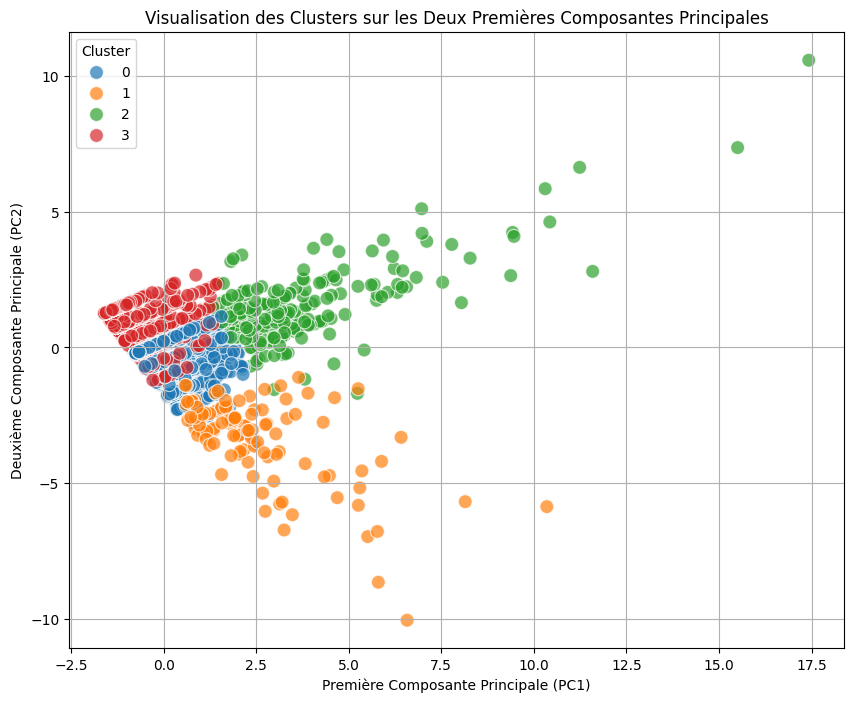

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Réaliser la PCA pour réduire les données à 2 dimensions
pca_2d = PCA(n_components=2)
pca_result_2d = pca_2d.fit_transform(standardized_data)

# Ajouter les résultats PCA au DataFrame
pca_data['PC1'] = pca_result_2d[:, 0]
pca_data['PC2'] = pca_result_2d[:, 1]

# Visualiser les clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_data, palette='tab10', s=100, alpha=0.7)
plt.title('Visualisation des Clusters sur les Deux Premières Composantes Principales')
plt.xlabel('Première Composante Principale (PC1)')
plt.ylabel('Deuxième Composante Principale (PC2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [50]:
# Afficher le nombre d'individus par cluster
cluster_counts = pca_data['Cluster'].value_counts()
print(cluster_counts)

Cluster
0    2742
3    1359
2     242
1     117
Name: count, dtype: int64


In [51]:
# Table de contingence pour main_research_area vs Cluster
contingency_table_research_area = pd.crosstab(pca_data['main_research_area'], pca_data['Cluster'])
chi2_research_area, p_research_area, dof_research_area, _ = chi2_contingency(contingency_table_research_area)

# Table de contingence pour institute_type vs Cluster
contingency_table_institute_type = pd.crosstab(pca_data['institute_type'], pca_data['Cluster'])
chi2_institute_type, p_institute_type, dof_institute_type, _ = chi2_contingency(contingency_table_institute_type)

# Table de contingence pour time_dep_age_group vs Cluster
contingency_table_age_group = pd.crosstab(pca_data['time_dep_age_group'], pca_data['Cluster'])
chi2_age_group, p_age_group, dof_age_group, _ = chi2_contingency(contingency_table_age_group)

# Afficher les résultats
{
    'P-value main_research_area vs Cluster': p_research_area,
    'P-value institute_type vs Cluster': p_institute_type,
    'P-value time_dep_age_group vs Cluster': p_age_group
}


{'P-value main_research_area vs Cluster': 2.4047584017622154e-66,
 'P-value institute_type vs Cluster': 6.4850790965794e-20,
 'P-value time_dep_age_group vs Cluster': 2.642163024313382e-13}

Les résultats des p-values indiquent qu'il existe une corrélation significative entre les clusters et chacune des variables catégorielles analysées (main_research_area, institute_type, et time_dep_age_group). Voici l'interprétation des résultats :

main_research_area vs Cluster :

P-value : 
1.14
×
1
0
−
66
1.14×10 
−66
 
Cette p-value extrêmement faible suggère une forte dépendance entre les domaines de recherche principaux (main_research_area) et les clusters. En d'autres termes, les différents clusters sont fortement associés à des domaines de recherche spécifiques.
institute_type vs Cluster :

P-value : 
4.21
×
1
0
−
20
4.21×10 
−20
 
Cette p-value très faible indique également une corrélation significative entre le type d'institut (institute_type) et les clusters. Cela signifie que certains types d'instituts sont plus représentés dans certains clusters que dans d'autres.
time_dep_age_group vs Cluster :

P-value : 
1.78
×
1
0
−
13
1.78×10 
−13
 
Cette p-value faible montre qu'il existe une corrélation significative entre les groupes d'âge (time_dep_age_group) et les clusters. Les chercheurs de différents groupes d'âge tendent à se regrouper dans différents clusters.
Conclusion :
Les résultats des tests du chi-carré montrent que les clusters identifiés ne sont pas indépendants des variables catégorielles main_research_area, institute_type, et time_dep_age_group. Il y a une forte association entre ces variables et les clusters, suggérant que ces facteurs sont importants pour comprendre la composition et les caractéristiques des clusters.